In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import DecisionBoundaryDisplay

In [2]:
iris = datasets.load_iris()

In [3]:
X = iris.data[:,:2]
Y = iris.target

C=1e5: large C means less regularization → more flexible decision boundary.

In [4]:
logReg = LogisticRegression(C=1e5)
logReg.fit(X,Y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,100000.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


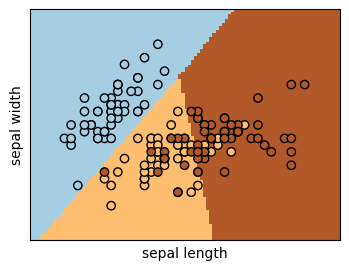

In [5]:
_, ax = plt.subplots(figsize=(4,3))
DecisionBoundaryDisplay.from_estimator(
    logReg,
    X,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
    xlabel="sepal length",
    ylabel="sepal width",
    eps=0.5
)

plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors="k",
            cmap = plt.cm.Paired)

plt.xticks(())
plt.yticks(())
plt.show()

In [6]:
from sklearn.metrics import accuracy_score,confusion_matrix, ConfusionMatrixDisplay

Y_pred = logReg.predict(X)
acc = accuracy_score(Y, Y_pred)
print(f"Training accuracy: {acc:.2f}")

Training accuracy: 0.83


In [7]:
cm = confusion_matrix(Y, Y_pred)
print(cm)


[[50  0  0]
 [ 0 38 12]
 [ 0 13 37]]


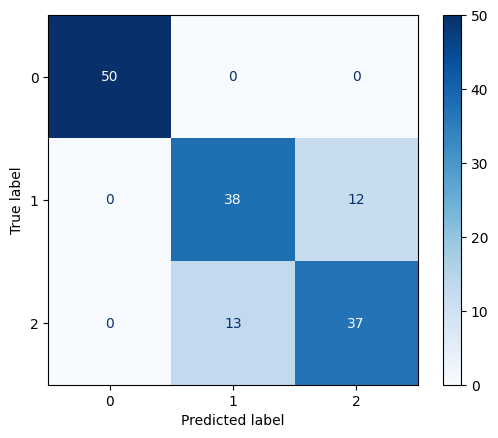

In [8]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logReg.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()